##### Exploratory Data Analysis of:
# Top Tech Employees' Workplace Experiance
___

**Context:** Over 67k employee reviews for Google, Amazon, Facebook, Apple, and Microsoft.

**Acknowledgements:** This data was scraped from Glassdoor.

**Questions**
- What company has been improving best?
- based on this data what company seems the best choice for a specific postion?
- is there a relationship base on stock market mometoum and volatility and employee's workplace rating?
- What pros each company is best at?
- what positions seem to be happiest in each company? (and overall)

- a company cultur is like a living thing, it grows, changes, fades away, It's the direction that matters most for current and potential employees perhaps more than where they are now. So recent reviews so weigh more of general status of a cimpany.


- what proportion of employees felt comfortable enough not tobe Anonymous?
___

Scratch Notes

- Exploratory Data Analysis and Visualization for Text Data
- Create a stunning visualization
- focus of the project is on exploratory data analysis
- worthy of posting it to Medium, Kaggle
- Emplopyers and My Tech Friends value it

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://www.kaggle.com/aashita/exploratory-data-analysis-of-comments-on-nyt

https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

Table of contents:
1. [Importing modules and loading data ](#import)

## Importing modules and loading data <a name="import"></a>

#### First we import python modules and setting notebook environment

In [1]:
# Essential Data Analysis Ecosystem Libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Python Standard Libraries
import os  # os file operations
import re  # regular experesion  for data cleaning
from collections import Counter

# Layer Two Libararies
import textblob

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set plots to be embedded inline
%matplotlib inline

# base color
color = sns.color_palette()[0]

#### Load up our dataset to a DataFrame

In [2]:
# dataset starting file(s)
dataset_path = 'input/'
print ('Dataset file(s):', os.listdir(dataset_path))

# TODO: If there is a new version of the dataset, programmatically download updated dataset zip file from Kaggle.

df = pd.read_csv(os.path.join(dataset_path, 'employee_reviews.csv'))

Dataset file(s): ['Untitled.ipynb', 'employee_reviews.csv', '.ipynb_checkpoints']


## First look at the data:<a name="import"></a>

#### Let's look at shape of our data and 3 random observations (reviews):

In [3]:
print('Number of rows (reviews) and columns:', df.shape)
df.sample(3)

Number of rows (reviews) and columns: (67529, 17)


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
3439,3440,google,"Austin, TX","Jan 7, 2015",Former Employee - Senior Strategist,Senior Strategist,-Flexible work schedule -Your opinion matters ...,-Inexperienced middle management -They usually...,none,5.0,3.0,3.0,3.0,4.0,3.0,2,https://www.glassdoor.com/Reviews/Google-Revie...
67465,67466,microsoft,"London, England (UK)","Feb 25, 2011",Former Employee - Solution Specialist,A great company with some outstanding and supp...,Great people to work with. Committed to person...,Big company with a tendency to use overlay sal...,Microsoft is a great place to work - I'd absol...,4.0,5.0,none,3.5,3.5,4.0,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
5333,5334,google,none,"Mar 20, 2018",Current Employee - Anonymous Employee,Channel program manager,Provide cab facility and of course the food is...,Too process driven but totally depends on team.,none,5.0,none,none,none,none,none,2,https://www.glassdoor.com/Reviews/Google-Revie...


#### Information about columns by data provider:

This dataset contains employee reviews separated into the following categories. 
> Comments in blue are data tidiness and quality issues that we will fix before start exploring the data.

##### Columns
- Index: index
- - <font color='blue'> Unnamed column is redundant. Same as index. To be dropped</font>
- Company: Company name
- Location : This dataset is global, as such it may include the country's name in parenthesis i.e "Toronto, ON(Canada)". However, if the location is in the USA then it will only include the city and state i.e "Los Angeles, CA".
- - <font color='blue'> Tidiness issue: Global location column contains 3 different 'city, state, and country' values. This column is to be separated in 3 columns.</font>
- Date Posted: in the following format MM DD, YYYY
- Job-Title: This string will also include whether the reviewer is a 'Current' or 'Former' Employee at the time of the review
- - <font color='blue'> Tidiness issue: employee_status (current or former) and job_title are to be seperated in two columns.</font>
- Summary: Short summary of employee review
- Pros: Pros
- Cons: Cons
- Overall Rating: 1-5
- Work/Life Balance Rating: 1-5
- Culture and Values Rating: 1-5
- Career Opportunities Rating: 1-5
- Comp & Benefits Rating: 1-5
- Senior Management Rating: 1-5
- Helpful Review Count: A count of how many people found the review to be helpful
- Link to Review : This will provide you with a direct link to the page that contains the review. However it is likely that this link will be outdated

NOTE: 'none' is placed in all cells where no data value was found.
- - <font color='blue'> Data Quality issue: Missleading representation of missing values with 'none'. To be replaced with NaN.</font>



#### Information about the columns' names, datatypes, unique values, and null values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [5]:
df.nunique()

Unnamed: 0                    67529
company                           6
location                       2044
dates                          3824
job-title                      8308
summary                       42649
pros                          66085
cons                          66049
advice-to-mgmt                35190
overall-ratings                   5
work-balance-stars               10
culture-values-stars              6
carrer-opportunities-stars       10
comp-benefit-stars               10
senior-mangemnet-stars           10
helpful-count                    99
link                           6754
dtype: int64

In [6]:
sdf = df.sample(5)

In [7]:
# open sample links to get familiar with source of data

slinks = sdf['link']
print(slinks.values)
answer = input('Enter,  y  if you would like to open and see these sample reviews\` urls? ')
if answer.lower()=='y':
#     webbrowser.open(sample_reviews.values)
    [webbrowser.open(page) for page in slinks]

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036_P537.htm'
 'https://www.glassdoor.com/Reviews/Facebook-Reviews-E40772_P12.htm'
 'https://www.glassdoor.com/Reviews/Apple-Reviews-E1138_P1008.htm'
 'https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036_P2250.htm'
 'https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036_P182.htm']
Enter,  y  if you would like to open and see these sample reviews\` urls? 


## Data Wrangling

#### There are 3 values of  `city, state, country` in location column. We will make this tidy by separating each value in its own column.

In [8]:
# location column before cleaning
df['location'].sample(10)

13799             Seattle, WA
17259                    none
12985                    none
45510        Santa Monica, CA
6450                     none
57417                    none
54107                    none
48271                    none
49412    Toronto, ON (Canada)
56926             Redmond, WA
Name: location, dtype: object

In [9]:
# Tidiness
# functions to make extrat "city, state, and country" values from location column 
# to 3 columns

btween_parentheses = r'\(([^)]+)\)'  # Regular expression to get a string between parentheses


def get_country(location):
    """Extracts and returns country name from location string.
    Returns NaN if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        return not_usa[0]
    else:
        return 'USA'
    

def get_state(location):
    """Extracts and returns state name (if aby) from location string.
    Returns Nan if 'none or not applicable."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[1].split()[0]
        else:
            return np.nan
    else:
        return location.strip()[-2:]

    
def get_city(location):
    """Extracts and returns city name from location string.
    Returns Nan if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[0]
        else:
            return location.split()[0]
    else:
        return location.split(',')[0]    

In [10]:
df['city'] = df.location.apply(get_city)
df['state'] = df.location.apply(get_state)
df['country'] = df.location.apply(get_country)

In [11]:
# Test
df[['city', 'state', 'country']].sample(5)

,city,state,country
3780,NaN,NaN,NaN
19051,NaN,NaN,NaN
40035,Bellevue,WA,USA
46084,Peabody,MA,USA
35985,Los Gatos,CA,USA


#### Renaming Columns for Clarity

- We rename all 5 rating columns to start with `r_`.
- All columns\` names to singular nouns.
- Change connecting dashs `-` to underscores `_`.

In [12]:
df.rename(columns={'dates': 'date',
                   'advice-to-mgmt': 'advice_to_mgmt',
                   'overall-ratings': 'r_overall',
                   'work-balance-stars': 'r_work_balance',
                   'culture-values-stars': 'r_culture',
                   'carrer-opportunities-stars': 'r_career_opp',
                   'comp-benefit-stars': 'r_comp_benefit',
                   'senior-mangemnet-stars': 'senior_mangemnet',
                   'helpful-count': 'helpful_count'}, inplace=True);

####  Seperate `job-title` column values to 2 columns, current_emp and job_title.

In [13]:
df['current_emp'] = df['job-title'].apply(lambda column: True if column.split()[0] == 'Current' else False)
df['job_title'] = df['job-title'].apply(lambda column: column.split('-')[1])

#### Dropping redundant columns

In [14]:
drop_columns = ['Unnamed: 0', 'location', 'job-title', 'link']
df.drop(columns=drop_columns, axis=1, inplace=True)

## Data Type and Value Corrections

In [15]:
# Replace misrepresentations of missing values to NaN
df.replace('none', np.nan, inplace=True);

In [16]:
# Datetime Types:
df.date = pd.to_datetime(df.date, errors='coerce')

In [17]:
rating_cols = [col for col in df.columns if col.startswith('r_')]

In [ ]:
# Rating values to Numeric
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')

In [22]:
# Correct in between rating values to lower rating before
def five_ratings_only(col):
    for idx in col.value_counts().index:
        col[col==idx] = int(float(idx))
    return col

for col in rating_cols:
    df[col] = five_ratings_only(df[col])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 18 columns):
company             67529 non-null object
date                67525 non-null datetime64[ns]
summary             67400 non-null object
pros                67529 non-null object
cons                67528 non-null object
advice_to_mgmt      38068 non-null object
r_overall           67529 non-null float64
r_work_balance      60369 non-null object
r_culture           53983 non-null object
r_career_opp        60421 non-null object
r_comp_benefit      60368 non-null object
senior_mangemnet    59754 non-null object
helpful_count       67529 non-null int64
city                42444 non-null object
state               34403 non-null object
country             42444 non-null object
current_emp         67529 non-null bool
job_title           67529 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(14)
memory usage: 8.8+ MB


The rating is based on a popular scale from 1 the worst to 5 the best. Some rating values in rating columns are in between levels i.e. 1.5, 2.5, 3.5, or 4.5. We will correct these rating by lowering them one level. E.g. 1.5 to 1, 2.5 to 2. Note There is no 0.5 nor 5.5 ratings to be corrected.

In [24]:
df['r_work_balance'].value_counts().index

Int64Index([4, 3, 5, 2, 1], dtype='int64')

## Missing Values
 - Cleaning Missing Values
 - Plotting Missing Values' Counts

In [25]:
def plot_missings(df, figsize=(15, 5)):
    
    fig, ax = plt.subplots(figsize=figsize)
    color = sns.color_palette()[3]
    
    x = df.isnull().sum().index.values
    y = df.isnull().sum()
    sns.barplot(x, y, color=color, ax=ax)
    locs, labels = plt.xticks(rotation=90)
    for loc, label, missings, in zip(locs, labels, y):
        if not missings:
            ax.text(loc, 0, 'None', rotation=0, va='bottom', ha='center')
        else:
            ax.text(loc, missings, missings, rotation=0, va='bottom', ha='center')

    ax.set(title='Missing Value Counts in all Columns', xlabel='Columns', ylabel='')

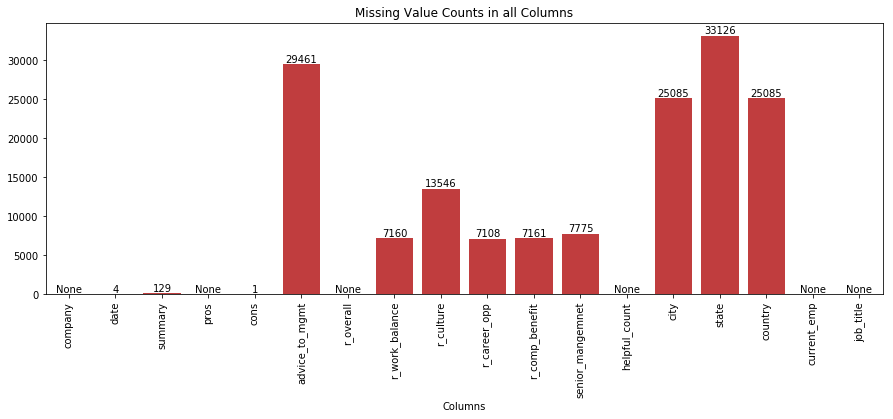

In [26]:
plot_missings(df)

**Observations**
- Fortunatly we have no missing values in overall-rating .

## Univariate Explorations

We will first look at the overall reviews rating distributions with an eye on differences between those left by past and current employees.

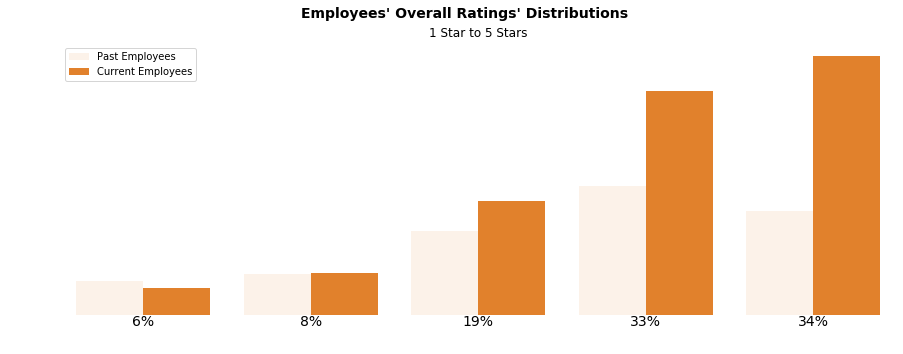

In [27]:
# Create the figure and axes and get access to them
fig, ax = plt.subplots(figsize=(15, 5))

# Figure's Title
fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[1]

x = 'r_overall'
hue = 'current_emp'
sns.countplot(ax=ax, data=df, x=x, hue=hue, color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Past Employees', 'Current Employees'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df.r_overall.value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

In [28]:
#TODO: Create two side by side donut plots with 3 wedges depicting 
# overal ratings of past & current employees in 3 Categorical groups
# Happy Employees consisting of 4 and 5 star reviews
# Neutral Employees consisting of only 3 starreviews
# Unhappy Employees consisting of 1 and 2 reviews

**Observation:** 
 - This plot shows unhappy past employees were more inclined to leave a low review than current employees.
 - We can see the current/past ratio increases as rating stars increeases. 
 - Happier current employees are leaving higher rating reviews maybe to show their appreciation.
 - Uphappier past employees are leaving lower rating reviews maybe to be heard!
 ___

#### Distributions of Reviews over time
#### Calculate Review Age Multiplier
#### New Col - Rating * TimeMultiplier

In [29]:
df['date'].min(), df['date'].max()

(Timestamp('2008-01-31 00:00:00'), Timestamp('2018-12-11 00:00:00'))

In [30]:
###
# Visualize number of reviews over each month in our dataset
# Visualize average of a rating over each year
dt = df['date'].values
# type(dt.values)
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

df.groupby('year').size()
d = df[df['year']>=2014]

____

### Side by Side Distribution of All Ratings Groups

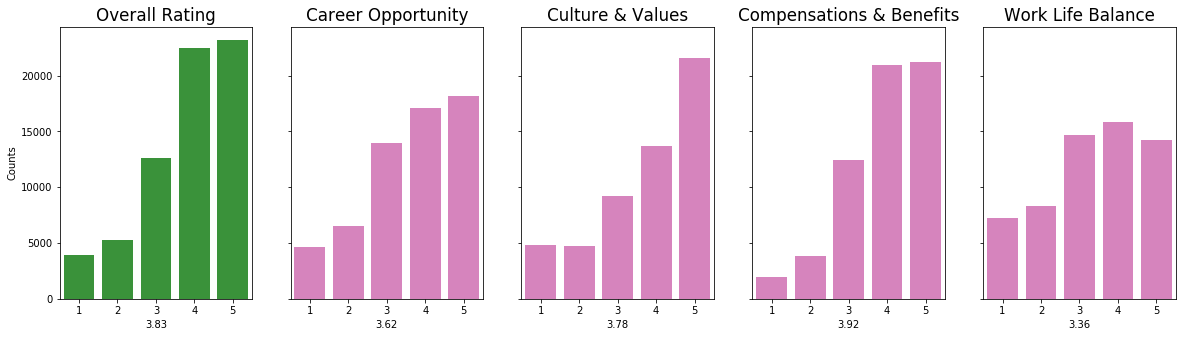

In [31]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20, 5))

# fig.suptitle('Distribution of all 5 Employees\' Ratings Groups', fontsize=22, fontweight='bold')

plt.rcParams.update({'font.size': 14})

color = sns.color_palette()[2]
xticks=[1, 2, 3, 4, 5]

sns.countplot(ax=ax0, data=df, x=df['r_overall'], color=color, order=xticks)

color = sns.color_palette()[6]
sns.countplot(ax=ax1, data=df, x=df['r_career_opp'], color=color, order=xticks)
sns.countplot(ax=ax2, data=df, x=df['r_culture'], color=color, order=xticks)
sns.countplot(ax=ax3, data=df, x=df['r_comp_benefit'], color=color, order=xticks)
sns.countplot(ax=ax4, data=df, x=df['r_work_balance'], color=color, order=xticks)

mean = '{:0.2f}'.format(df['r_overall'].mean())
ax0.set(title='Overall Rating', xlabel=mean, ylabel='Counts')

mean = '{:0.2f}'.format(df['r_career_opp'].mean())
ax1.set(title='Career Opportunity', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_culture'].mean())
ax2.set(title='Culture & Values', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_comp_benefit'].mean())
ax3.set(title='Compensations & Benefits', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_work_balance'].mean())
ax4.set(title='Work Life Balance', xlabel=mean, ylabel='');

# TODO: Print percentage of each bar on each bar on it.

**Findings Here:**
- Overall Rating seems to best follow employees hapiness (rating) with Compensation and Benefits. 
- Can we say Work Life Balance chart shows employees favor less time at work!?
___

### Helpful Count Distribution

This is the only numeric feature that comes with our dataset. Let's take a look at it's distribution

In [135]:
def hist_magnifier(df, x, xlim1, xlim2, binsize):
    plt.hist(data=df, x=x, bins=np.arange(xlim1, xlim2+binsize, binsize))
    plt.xlim(xlim1, xlim2);

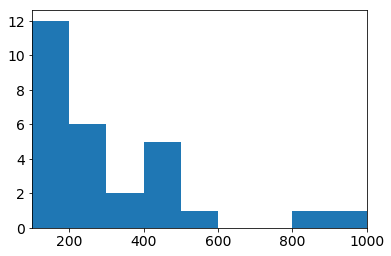

In [143]:
hist_magnifier(df, df.helpful_count, 100, 1000, 100)

In [120]:
df['helpful_count'].describe()

count    67529.000000
mean         1.268211
std         16.085852
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2094.000000
Name: helpful_count, dtype: float64

In [103]:
cum_hist = df['helpful_count'].value_counts(normalize=True).cumsum()
cum_hist[cum_hist<0.95]

0    0.666588
1    0.822254
2    0.888389
3    0.923514
4    0.944068
Name: helpful_count, dtype: float64

____

TypeError: cannot unpack non-iterable AxesSubplot object

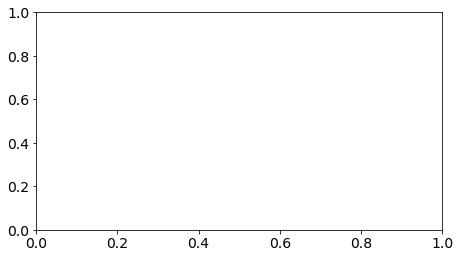

In [113]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
ax1, ax2 = plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]

sns.barplot(data=df, x='r_overall', y='r_work_balance', color=base_clr, capsize=.2, ax=ax1)


#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_overall', y='r_work_balance', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)
plt.ylim(1.5, 4.5)
plt.ylim(plot1.get_ylim())

In [ ]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]
plot1 = sns.barplot(data=df, x='r_overall', y='r_career_opp', color=base_clr, capsize=.1)
# plt.xticks(rotation=-15)

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_overall', y='r_career_opp', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)
plt.ylim(1.5, 4.5)

# plt.ylim(plot1.get_ylim())

In [ ]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]
plot1 = sns.barplot(data=df, x='r_overall', y='r_culture', color=base_clr, capsize=.1)
# plt.xticks(rotation=-15)

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_overall', y='r_culture', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)
plt.ylim(1.5, 4.5)

# plt.ylim(plot1.get_ylim())

In [ ]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]
plot1 = sns.barplot(data=df, x='r_overall', y='r_comp_benefit', color=base_clr, capsize=.1)
# plt.xticks(rotation=-15)

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_overall', y='r_comp_benefit', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)

plt.ylim(1.5, 4.5)
# plt.ylim(plot1.get_ylim())

In [ ]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]
plot1 = sns.barplot(data=df, x='r_culture', y='r_comp_benefit', color=base_clr, capsize=.1)
# plt.xticks(rotation=-15)

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_culture', y='r_comp_benefit', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)
plt.ylim(1.5, 4.5)

# plt.ylim(plot1.get_ylim())

In [ ]:
plt.figure(figsize=(16,4))

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 1)
base_clr = sns.color_palette()[7]
plot1 = sns.barplot(data=df, x='r_culture', y='r_career_opp', color=base_clr, capsize=.1)
# plt.xticks(rotation=-15)

#Show standard deviation of observations instead of a confidence interval
plt.subplot(1, 2, 2)

plot2 = sns.pointplot(data=df, x='r_culture', y='r_career_opp', color=base_clr, capsize=.1)
# plt.xticks(rotation=15)
plt.ylim(1.5, 4.5)

# plt.ylim(plot1.get_ylim())

In [ ]:
from random import sample

numbers = sample(range(1, 101), 20)
print(numbers)

for i, n in enumerate(numbers):
    if not n % 3 and not n % 5:
        numbers[i] = 'FizzBuzz'
    elif not n % 3:
        numbers[i] = 'Fizz'
    elif not n % 5:
        numbers[i] = 'Buzz'

print(numbers)

___

### Adding Numeric Features

In [ ]:
df

In [ ]:
df['job_title'].value_counts()

In [ ]:
df['p_advice'] = df.map(lambda text: textblob(text).sentiment.polarity)

In [ ]:
te